In [1]:
from tensorflow.keras import layers,Sequential,regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import CSVLogger
import numpy as np
import cv2
import matplotlib.pyplot as plt

(120, 91, 3)


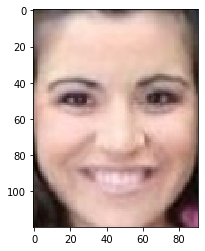

In [2]:
image_path = '../dataset/Training/female/131458.jpg.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
print(image.shape)

In [3]:
datagen = ImageDataGenerator()
train_data = datagen.flow_from_directory('../dataset/Training/',color_mode='grayscale',target_size=(120,90),batch_size=256)
val_data = datagen.flow_from_directory('../dataset/Validation/',color_mode='grayscale',target_size=(120,90),batch_size=256)

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [4]:
model = Sequential([
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(120,90,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Dropout(0.4),
    layers.Flatten(),

    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(2,activation='softmax')
])

In [5]:
csvlogger = CSVLogger('accuracy.log',separator=',')

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit_generator(train_data,epochs=10,validation_data=val_data,callbacks=[csvlogger])
model.summary()

/home/sahil/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
Epoch 1/10
184/184 [==============================] - 295s 2s/step - loss: 0.6502 - accuracy: 0.7315 - val_loss: 0.2610 - val_accuracy: 0.8966
Epoch 2/10
184/184 [==============================] - 289s 2s/step - loss: 0.2633 - accuracy: 0.8943 - val_loss: 0.1891 - val_accuracy: 0.9303
Epoch 3/10
184/184 [==============================] - 289s 2s/step - loss: 0.2115 - accuracy: 0.9180 - val_loss: 0.1685 - val_accuracy: 0.9348
Epoch 4/10
184/184 [==============================] - 289s 2s/step - loss: 0.1886 - accuracy: 0.9286 - val_loss: 0.1429 - val_accuracy: 0.9462
Epoch 5/10
184/184 [==============================] - 289s 2s/step - loss: 0.1673 - accuracy: 0.9369 - val_loss: 0.1477 - val_accura

In [6]:
model.save('gender_classification_model')

INFO:tensorflow:Assets written to: gender_classification_model/assets
